In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [5]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
dataset=pd.get_dummies(dataset)
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [17]:
x=dataset.iloc[:,[4,5]].values

In [18]:
from sklearn.mixture import GaussianMixture as GM
GMM=GM(n_components=3, covariance_type='full')
y_gmm=GMM.fit(x)
y_gmm=GMM.predict(x)

C:\Users\USER\anaconda3\envs\aiml\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [19]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_Group']=y_gmm
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,Cluster_Group
0,1,19,15,39,False,True,1
1,2,21,15,81,False,True,1
2,3,20,16,6,True,False,0
3,4,23,16,77,True,False,0
4,5,31,17,40,True,False,0
...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,0
196,197,45,126,28,True,False,0
197,198,32,126,74,False,True,1
198,199,32,137,18,False,True,1


C:\Users\USER\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


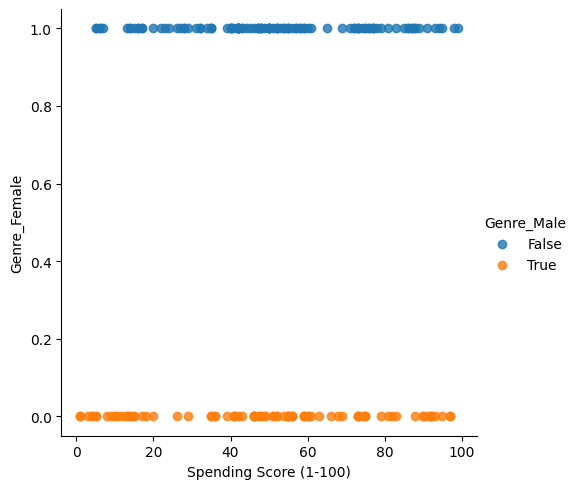

In [20]:
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False
                ,legend=True,legend_out=True)